# NICAR 2017 agate hands-on    

## Importing agate

Let's get started!

In [1]:
import agate

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 12:46:01.289629. Please add timezone info to timestamps.


## Loading data from a CSV

In [3]:
alligators = agate.Table.from_csv('alligators.csv')

/Users/cgroskopf/src/nicar-2017-agate/.venv/lib/python3.6/site-packages/babel/localtime/_unix.py:8: DeprecationWarning: Flags not at the start of the expression ^Time Zone: (.*)$(?m (truncated)
/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 12:46:32.168775. Please add timezone info to timestamps.


## Describing and viewing the table

In [4]:
print(alligators)

| column       | data_type |
| ------------ | --------- |
| Year         | Number    |
| Area Number  | Number    |
| Area Name    | Text      |
| Carcass Size | Text      |
| Size         | Number    |
| Harvest Date | Date      |



/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 12:47:38.884812. Please add timezone info to timestamps.


In [36]:
len(alligators)

87181

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 16:32:24.223980. Please add timezone info to timestamps.


In [35]:
alligators.print_table()

|  Year | Area Number | Area Name   | Carcass Size  |    Size | Harvest Date |
| ----- | ----------- | ----------- | ------------- | ------- | ------------ |
| 2,000 |         101 | LAKE PIERCE | 11 ft. 5 in.  | 11.417… |   2000-09-22 |
| 2,000 |         101 | LAKE PIERCE | 9 ft. 0 in.   |  9.000… |   2000-10-02 |
| 2,000 |         101 | LAKE PIERCE | 8 ft. 10 in.  |  8.833… |   2000-10-06 |
| 2,000 |         101 | LAKE PIERCE | 8 ft. 0 in.   |  8.000… |   2000-09-25 |
| 2,000 |         101 | LAKE PIERCE | 8 ft. 0 in.   |  8.000… |   2000-10-07 |
| 2,000 |         101 | LAKE PIERCE | 8 ft. 0 in.   |  8.000… |   2000-09-22 |
| 2,000 |         101 | LAKE PIERCE | 7 ft. 2 in.   |  7.167… |   2000-09-21 |
| 2,000 |         101 | LAKE PIERCE | 7 ft. 1 in.   |  7.083… |   2000-09-21 |
| 2,000 |         101 | LAKE PIERCE | 6 ft. 11 in.  |  6.917… |   2000-09-25 |
| 2,000 |         101 | LAKE PIERCE | 6 ft. 7 in.   |  6.583… |   2000-09-25 |
| 2,000 |         101 | LAKE PIERCE | 6 ft. 6 in.   

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 16:31:05.590908. Please add timezone info to timestamps.


## Aggregating column data

**Question:** How many alligators were harvest in 2015?

In [13]:
alligators.aggregate(agate.Count('Year', 2015))

6726

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 16:21:02.946066. Please add timezone info to timestamps.


**Question:** What was the median size of harvested alligators?

In [14]:
alligators.aggregate(agate.Median('Size'))

Decimal('8.166666667')

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 16:21:25.277567. Please add timezone info to timestamps.


## Selecting and filtering data

**Question:** Are Lake Pierce's gators bigger or smaller than gators elsewhere?

In [23]:
lake_pierce_gators = alligators.where(lambda row: row['Area Name'] == 'LAKE PIERCE')

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 16:24:22.313736. Please add timezone info to timestamps.


In [24]:
len(lake_pierce_gators.rows)

284

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 16:24:25.622030. Please add timezone info to timestamps.


In [25]:
lake_pierce_gators.aggregate(agate.Median('Size'))

Decimal('7.833333333')

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 16:24:47.815438. Please add timezone info to timestamps.


## Computing new columns

**Question:** How long did individuals remain in prison before being exonerated?

In [30]:
import decimal

metric_gators = alligators.compute([
    ('size_meters', agate.Formula(agate.Number(), lambda row: row['Size'] * decimal.Decimal(0.3048)))
])

metric_gators.aggregate(agate.Max('size_meters'))

Decimal('4.343400000000000218958184917')

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 16:28:56.653172. Please add timezone info to timestamps.


## Sorting and slicing

**Question:** Where were the largest alligators harvested?

In [37]:
sorted_by_size = alligators.order_by('Size', reverse=True).limit(10)

biggest_gators = sorted_by_size.limit(10)

biggest_gators.print_table()

|  Year | Area Number | Area Name            | Carcass Size  |    Size | Harvest Date |
| ----- | ----------- | -------------------- | ------------- | ------- | ------------ |
| 2,010 |         502 | ST. JOHNS RIVER (... | 14 ft. 3 in.  | 14.250… |   2010-10-31 |
| 2,014 |         828 | HIGHLANDS COUNTY     | 14 ft. 3 in.  | 14.250… |   2014-10-28 |
| 2,008 |         510 | LAKE JESUP           | 14 ft. 1 in.  | 14.083… |   2008-08-26 |
| 2,013 |         733 | LAKE TALQUIN         | 14 ft. 1 in.  | 14.083… |   2013-09-02 |
| 2,012 |         828 | HIGHLANDS COUNTY     | 14 ft. 0 in.  | 14.000… |   2012-10-31 |
| 2,008 |         508 | CRESCENT LAKE        | 13 ft. 11 in. | 13.917… |   2008-09-21 |
| 2,007 |         823 | GULF COUNTY          | 13 ft. 10 in. | 13.833… |   2007-08-16 |
| 2,007 |         103 | KISSIMMEE RIVER (... | 13 ft. 9 in.  | 13.750… |   2007-08-30 |
| 2,008 |         864 | VOLUSIA COUNTY       | 13 ft. 9 in.  | 13.750… |   2008-11-30 |
| 2,013 |         852 | PINELLAS

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 16:33:21.386812. Please add timezone info to timestamps.


**Question**: What is the distribution of alligator sizes?

In [38]:
binned_sizes = alligators.bins('Size')
binned_sizes.print_bars('Size', 'Count', width=80)

Size       Count
[0 - 2)       91 ▓                                                              
[2 - 4)      307 ▓                                                              
[4 - 6)    5,824 ▓░░░░░░░░░                                                     
[6 - 8)   32,041 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░            
[8 - 10)  30,523 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░               
[10 - 12) 16,341 ▓░░░░░░░░░░░░░░░░░░░░░░░░░                                     
[12 - 14)  2,049 ▓░░░                                                           
[14 - 16)      5 ▓                                                              
                 +---------------+--------------+--------------+---------------+
                 0            10,000         20,000         30,000        40,000


/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 16:34:04.231545. Please add timezone info to timestamps.


Grouping and aggregating
========================

**Question:** Which area has harvested the most alligators?

In [46]:
by_area = alligators.group_by('Area Name')

area_totals = by_area.aggregate([
    ('count', agate.Count())
])

sorted_totals = area_totals.order_by('count', reverse=True)

sorted_totals.print_table(max_rows=5, max_column_width=40)

| Area Name                       | count |
| ------------------------------- | ----- |
| ST. JOHNS RIVER (LAKE POINSETT) | 5,188 |
| LAKE OKEECHOBEE (SOUTH)         | 4,122 |
| ORANGE LAKE                     | 3,110 |
| LAKE OKEECHOBEE (WEST)          | 3,073 |
| KISSIMMEE RIVER                 | 2,978 |
| ...                             |   ... |


/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 16:36:48.706039. Please add timezone info to timestamps.


**Question**: Which area harvests the largest alligators?

In [48]:
area_medians = by_area.aggregate([
    ('count', agate.Count()),
    ('median_size', agate.Median('Size'))
])

sorted_medians = area_medians.order_by('median_size', reverse=True)

sorted_medians.print_table(max_rows=5, max_column_width=40)

| Area Name         | count | median_size |
| ----------------- | ----- | ----------- |
| ST. JOHNS         |     1 |     11.583… |
| LAKE              |     2 |     10.500… |
| STICK MARSH       |   503 |     10.417… |
| LAKE PARKER       |    25 |     10.250… |
| PALM BEACH COUNTY |    82 |      9.750… |
| ...               |   ... |         ... |


/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 16:39:01.693914. Please add timezone info to timestamps.


## Multi-dimensional aggregation

**Question**: Where and when was the largest concentration of big alligators harvested?

In [51]:
by_area_and_year = by_area.group_by('Year')

bigguns = by_area_and_year.where(lambda row: row['Size'] >= 12)

biggun_groups = bigguns.aggregate([
    ('count', agate.Count())
])

sorted_groups = biggun_groups.order_by('count', reverse=True)

sorted_groups.print_table()

| Area Name            |  Year | count |
| -------------------- | ----- | ----- |
| LAKE OKEECHOBEE (... | 2,000 |    43 |
| LAKE OKEECHOBEE (... | 2,006 |    34 |
| LAKE JESUP           | 2,009 |    32 |
| LAKE OKEECHOBEE (... | 2,001 |    26 |
| LAKE GEORGE          | 2,005 |    22 |
| LAKE OKEECHOBEE (... | 2,006 |    20 |
| LAKE GEORGE          | 2,013 |    20 |
| LAKE OKEECHOBEE (... | 2,000 |    18 |
| LAKE GEORGE          | 2,006 |    18 |
| LAKE GEORGE          | 2,007 |    18 |
| LAKE JESUP           | 2,008 |    17 |
| LAKE GEORGE          | 2,011 |    17 |
| LAKE OKEECHOBEE (... | 2,004 |    16 |
| LAKE GEORGE          | 2,010 |    16 |
| PUTNAM COUNTY        | 2,011 |    16 |
| LAKE OKEECHOBEE (... | 2,007 |    15 |
| LAKE JESUP           | 2,010 |    14 |
| LAKE OKEECHOBEE (... | 2,000 |    14 |
| LAKE OKEECHOBEE (... | 2,001 |    14 |
| LAKE COUNTY          | 2,011 |    14 |
| ...                  |   ... |   ... |


/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-25 16:42:12.003829. Please add timezone info to timestamps.


## Exploratory charting

Beginning with version 1.5.0, agate includes the pure-Python SVG charting library [leather](http://leather.readthedocs.io/en/latest/). Leather allows you to generate "good enough" charts with as little as one line of code. It's especially useful if you're working in a Jupyter Notebook, as the results will render inline.

There are currently four chart types support: [`Table.bar_chart`](http://agate.readthedocs.io/en/1.5.6/api/table.html#agate.Table.bar_chart), [`Table.column_chart`](http://agate.readthedocs.io/en/1.5.6/api/table.html#agate.Table.column_chart), [`Table.line_chart`](http://agate.readthedocs.io/en/1.5.6/api/table.html#agate.Table.line_chart), and [`Table.scatterplot`](http://agate.readthedocs.io/en/1.5.6/api/table.html#agate.Table.scatterplot).

Let's create charts from a few slices of data we've made in this tutorial.

### Exonerations by state

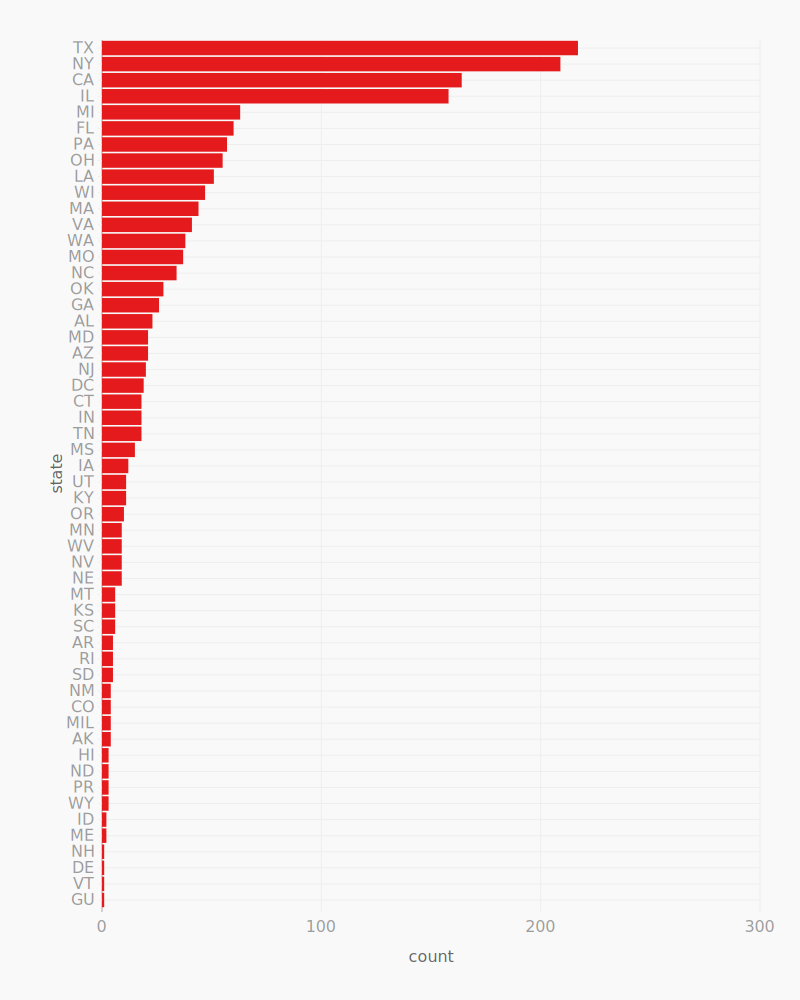

In [35]:
sorted_totals.bar_chart('state', 'count', height=1000)

Leather will try to maintain a reasonable aspect ratio for chart. In this case the chart is too short to display correctly. We've used the `height` argument to make the chart a little taller.

### Exonerations by age bracket

When creating a chart you may omit the column name arguments. If you do so the first and second columns in the table will be used. This is especially useful for charting the output of [`TableSet.aggregate`](http://agate.readthedocs.io/en/1.5.6/api/tableset.html#agate.TableSet.aggregate) or [`Table.bins`](http://agate.readthedocs.io/en/1.5.6/api/table.html#agate.Table.bins).

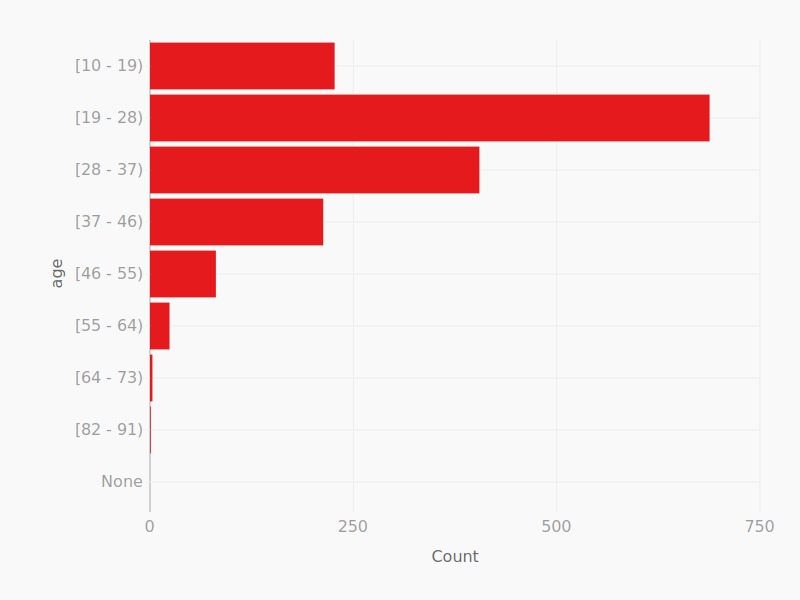

In [36]:
binned_ages.bar_chart()

### Exonerations by year

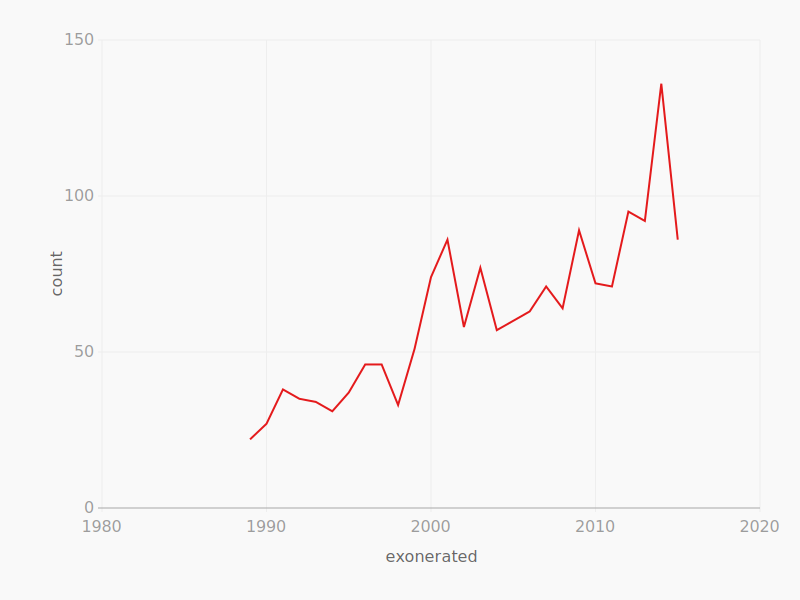

In [38]:
by_year_exonerated = exonerations.group_by('exonerated')

counts = by_year_exonerated.aggregate([
    ('count', agate.Count())
])

counts.order_by('exonerated').line_chart('exonerated', 'count')

### Exonerations over time, for most commonly exonerated crimes

The real power of agate's exploratory charting comes when we want to compare different facets of data. With leather, agate can automatically render a of chart for each group in a TableSet.

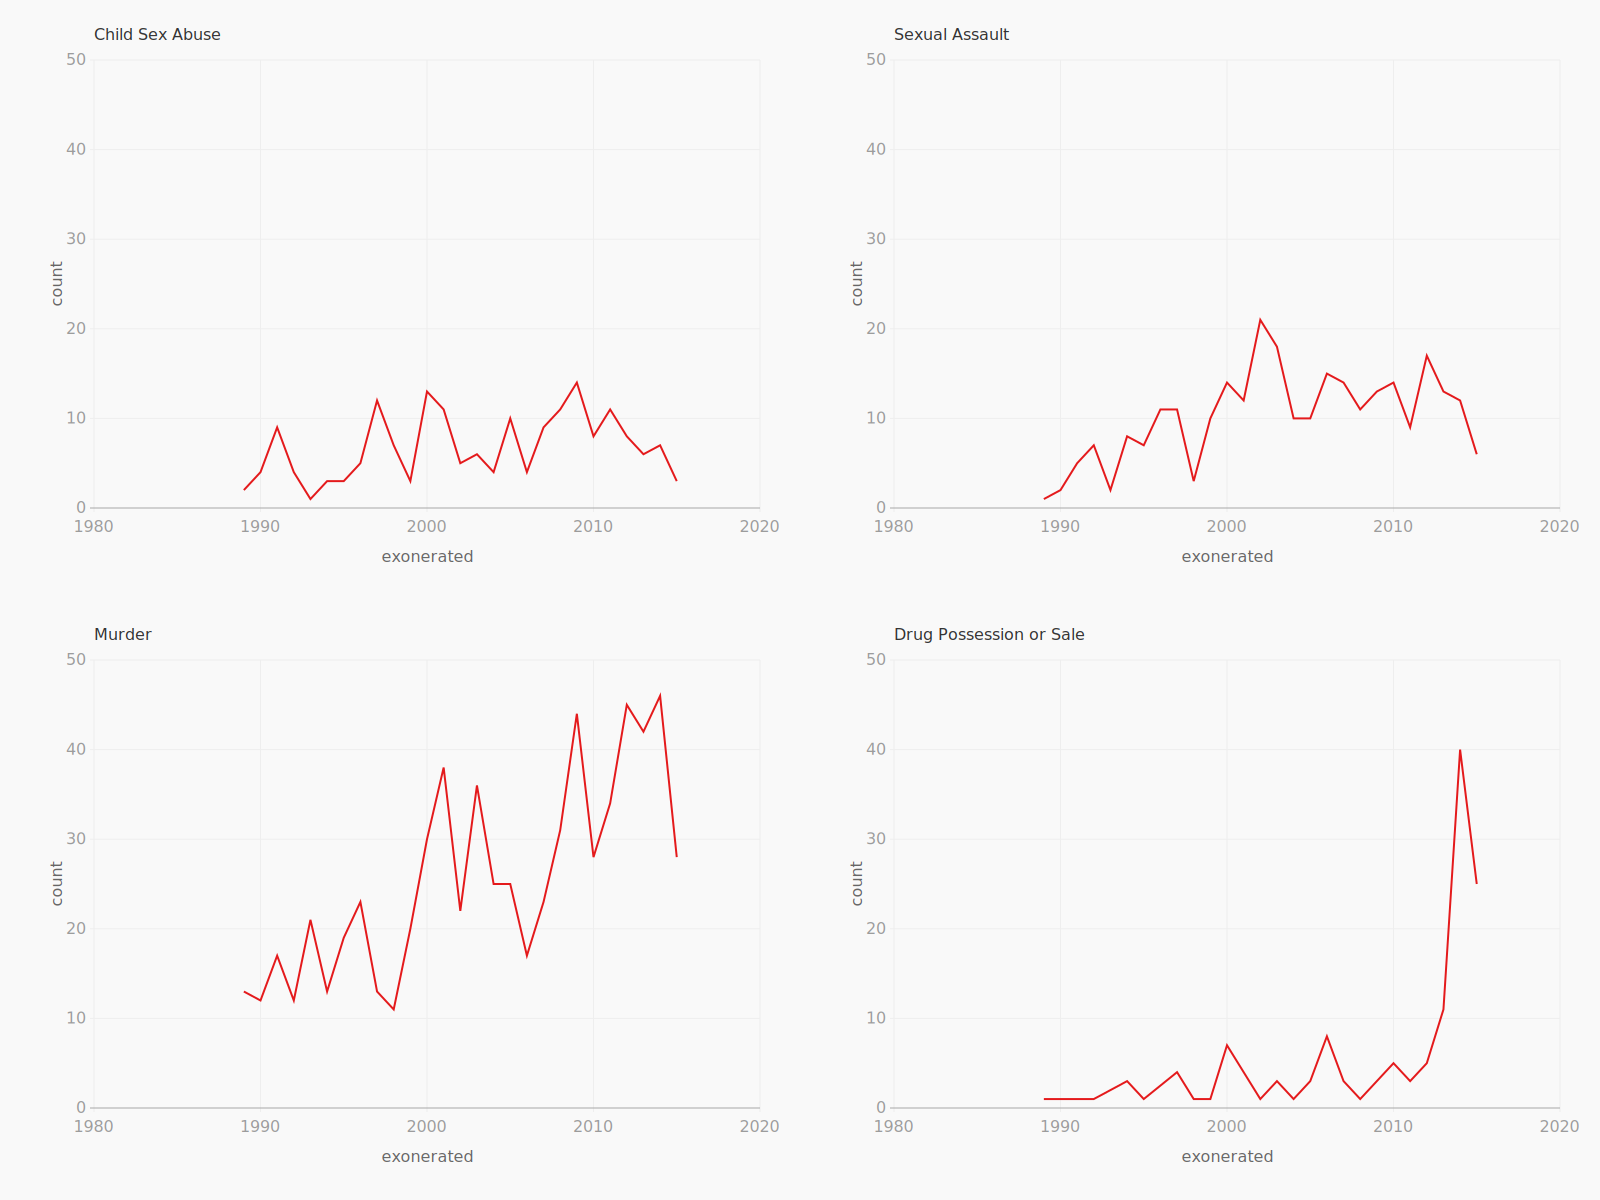

In [41]:
# Filter to crimes with at least 100 exonerations
top_crimes = exonerations.group_by('crime').having([
    ('count', agate.Count())
], lambda t: t['count'] > 100)

# Group by year of exoneration
by_year = top_crimes.group_by('exonerated')

# Count number of exonerations in each year
counts = by_year.aggregate([
    ('count', agate.Count())
])

# Group by crime
by_crime = counts.group_by('crime')

# Sort each group of exonerations by year and chart the results
by_crime.order_by('exonerated').line_chart('exonerated', 'count')

### Styling charts

As mentioned above, leather is designed for making "good enough" charts. You are never going to create a polished chart. However, sometimes you may want more control than agate offers through it's own methods. You can take more control over how your charts are presented by using [leather](http://leather.readthedocs.io/) directly.

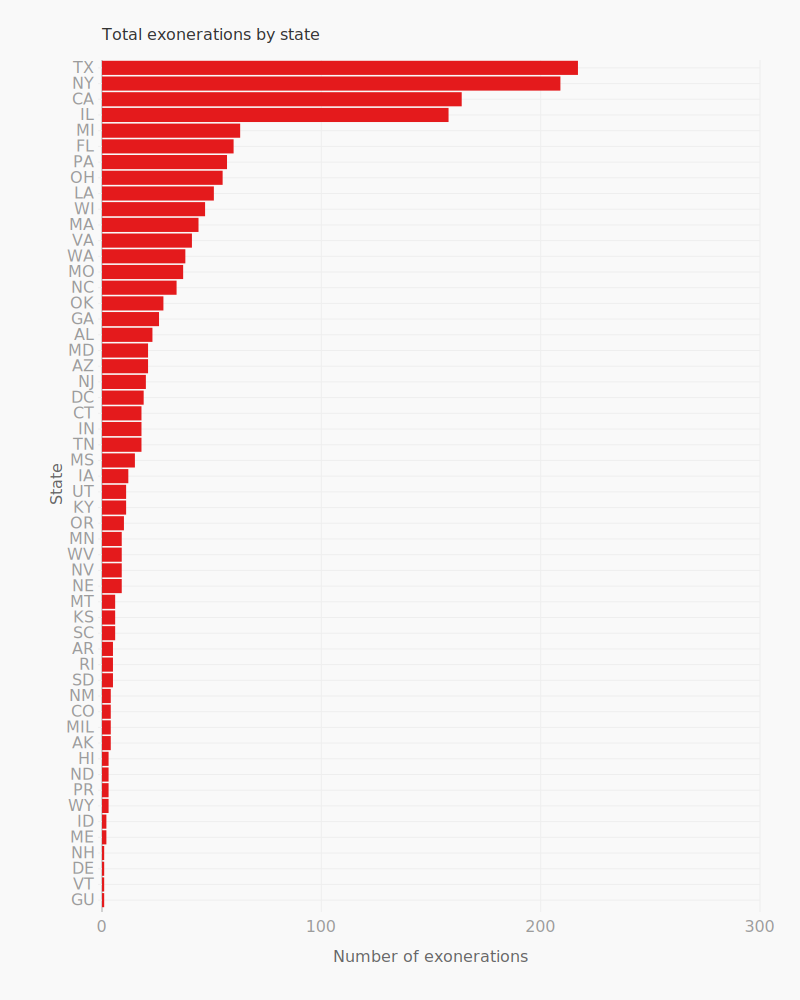

In [52]:
import leather

chart = leather.Chart('Total exonerations by state')
chart.add_y_axis(name='State')
chart.add_x_axis(name='Number of exonerations')
chart.add_bars(sorted_totals, x='count', y='state')
chart.to_svg(height=1000)

Where to go next
================

This tutorial only scratches the surface of agate's features. For many more ideas on how to apply agate, check out the [`Cookbook`](http://agate.readthedocs.io/en/1.5.6/cookbook.html), which includes dozens of examples of specific features of agate as well as recipes for substituting agate for Excel, SQL, R and more. Also check out the agate's [`Extensions`](http://agate.readthedocs.io/en/1.5.6/extensions.html) which add support for reading/writing SQL tables, performing statistical analysis and more.

Also, if you're going to be doing data processing in Python you really ought to check out [`proof`](http://proof.readthedocs.org/en/1.5.6/), a library for building data processing pipelines that are repeatable and self-documenting. It will make your code cleaner and save you tons of time.

Good luck in your reporting!